In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('.')

In [2]:
import itertools

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd


from src.dsep import dataset
from src.dsep import utils

# Homework (part 2)
Implement function for checking whether two random variables are d-separable given some observations. You can use `networkx` for graph related functions (generation of paths between nodes, checking if there is an edge between nodes etc.).

In [3]:
def check_NA(G,v1,v2,C):
    result = True
    if v1 == v2: #sprawdza czy sam so siebie
        return 'N/A'
    neighbors = G.neighbors(v1) #sprawdza czy do sąsiada
    if v2 in neighbors:
        return 'N/A'
    neighbors = G.neighbors(v2)
    if v1 in neighbors:
        return 'N/A'
    if v1 in C:
        return 'N/A'
    if v2 in C:
        return 'N/A'

In [4]:
import networkx as nx
max_distance = 7
last_rule ='None'
def is_d_separable(G, v1, v2, C):  # Implement
    """Checks if v1 and v2 are d-separable given C.
    
    If d-separation is not applicable return 'N/A',
    otherwise return True/False, whether variables
    are d-separable or not.  
    """
    res = check_NA(G,v1,v2,C)
    if res == 'N/A':
        return res
    Undirected_G = nx.Graph(G)
    any_path = nx.has_path(Undirected_G,v1,v2)
    res = False
    if any_path:
        paths = nx.all_simple_paths(Undirected_G,v1,v2)
        clean_paths = []
        for path in paths:
            #print('possible path: ',path)
            if check_path(path,C,G): #returns true is all triples in path are active
                clean_paths.append(path)
        #print('active_paths',clean_paths)        
        if len(clean_paths)>0:
            res = False #There is a independent path
        else:
            res = True #There is no 'clean path'
    else:
        return True
    return res

def check_path(path,C,G):
   # A path is active if every triple in path is active (not separable): 
    triples = []
    for i in range(len(path)-2):
        triple = [path[i],path[i+1],path[i+2]]
        triples.append(triple)
    check_results = []
    for triple in triples:
        check_results.append(check_triple(triple,G,C))# True - active False- not active
    
    are_all_triples_active = all(check_results)
    #print('triple res',check_results,'are all:',are_all_triples_active)
    return are_all_triples_active # all have to be active
def check_triple(triple,G,C):
    is_active=True
    Undirected_G = nx.Graph(G)
    is_tail_to_tail = is_tail_tail(triple,G,C)
    is_head_to_tail = is_head_tail(triple,Undirected_G,C)
    is_head_to_head = is_head_head(triple,G,C)
    if is_tail_to_tail:
        is_active = check_tail_tail_active(triple,G,C)
    if is_head_to_tail:
        is_active = check_head_tail_active(triple,G,C)
    if is_head_to_head:
        is_active = check_head_head(triple,G,C)
    #print('type of triple',is_tail_to_tail,is_head_to_tail,is_head_to_head,triple,'is active: ',is_active)
    return is_active

In [5]:
def check_tail_tail_active(triple,G,C):
    middle = triple[1]
    if middle in C:
        return False #not active
    return True
def check_head_tail_active(triple,G,C):
    middle = triple[1]
    #print('head_tail_active',middle,C,middle in C)
    if middle in C:
        return False #not active
    return True
def check_head_head(triple,G,C):
    middle = triple[1]
    res = False #default not active
    if middle in C:
        return True #active
    #descendend of middle can be in C to make it active
    descendents= nx.descendants(G,middle)
    
    have_C_descendent = any(node in descendents for node in C)
    #print(descendents,triple,have_C_descendent)
    res = have_C_descendent
    
    return res

In [6]:
def is_tail_tail(triple,G,C): 
    A = triple[0]
    middle = triple[1]
    B = triple[2]
    middle_A = G.has_edge(middle,A)
    middle_B = G.has_edge(middle,B)
    if middle_A and middle_B: #it is a tail_to_tail.
        #print('tail to tail')
        return True #is tail_to_tail
    return False #not tail_to_tail
def is_head_tail(triple,G,C):
    A = triple[0]
    middle = triple[1]
    B = triple[2]
    A_middle = G.has_edge(A,middle)
    middle_B = G.has_edge(middle,B)
    #print(A_middle,middle_B,triple)
    if A_middle and middle_B:
        #print('head to tail')
        return True #is head to tail a-mid-b
    return False
def is_head_head(triple,G,C):
    A = triple[0]
    middle = triple[1]
    B = triple[2]
    A_middle = G.has_edge(A,middle)
    B_middle = G.has_edge(B,middle)
    if A_middle and B_middle:
        #print('head to head')
        return True #is head to tail a-mid-b
    return False
    

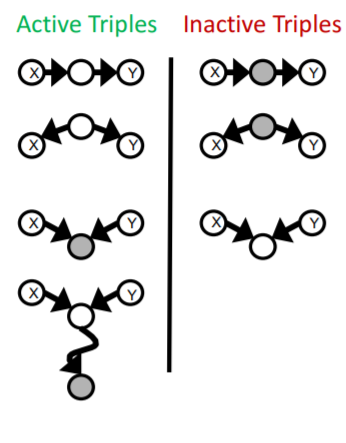

## Example PGM and observed variable
Gray nodes are observed and belong to the conditioning set.

* Error for (1, 4)
	Expected: False
	Got: True
* Error for (2, 4)
	Expected: False
	Got: True
* Error for (4, 1)
	Expected: False
	Got: True
* Error for (4, 2)
	Expected: False
	Got: True

False

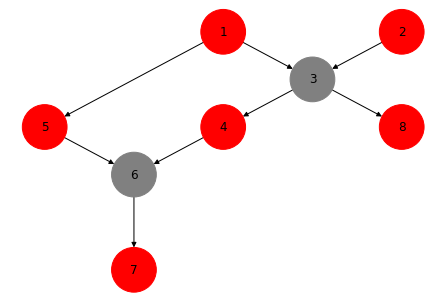

In [7]:
graph, node_pos = dataset.get_graph('second')
#conditioning_set = {7}
conditioning_set = {3, 6}
v1 = 1
v2 = 4
dataset.visualize(G=graph, C=conditioning_set, node_pos=node_pos)
is_d_separable(graph,v1,v2,conditioning_set)

## Check D-Separability for all variable pairs

In [8]:
df = utils.check_d_separability_for_all_node_pairs(
    G=graph,
    C=conditioning_set,
    d_sep_fn=is_d_separable,
)
print(df)

    v1  v2  d_sep
0    1   2  False
1    1   3    N/A
2    1   4  False
3    1   5    N/A
4    1   6    N/A
5    1   7   True
6    1   8   True
7    2   1  False
8    2   3    N/A
9    2   4  False
10   2   5  False
11   2   6    N/A
12   2   7   True
13   2   8   True
14   3   1    N/A
15   3   2    N/A
16   3   4    N/A
17   3   5    N/A
18   3   6    N/A
19   3   7    N/A
20   3   8    N/A
21   4   1  False
22   4   2  False
23   4   3    N/A
24   4   5  False
25   4   6    N/A
26   4   7   True
27   4   8   True
28   5   1    N/A
29   5   2  False
30   5   3    N/A
31   5   4  False
32   5   6    N/A
33   5   7   True
34   5   8   True
35   6   1    N/A
36   6   2    N/A
37   6   3    N/A
38   6   4    N/A
39   6   5    N/A
40   6   7    N/A
41   6   8    N/A
42   7   1   True
43   7   2   True
44   7   3    N/A
45   7   4   True
46   7   5   True
47   7   6    N/A
48   7   8   True
49   8   1   True
50   8   2   True
51   8   3    N/A
52   8   4   True
53   8   5   True
54   8   6

In [9]:
df[df.d_sep == True]


,v1,v2,d_sep
5,1,7,True
6,1,8,True
12,2,7,True
13,2,8,True
26,4,7,True
27,4,8,True
33,5,7,True
34,5,8,True
42,7,1,True
43,7,2,True


In [10]:
df[df.d_sep == 'N/A']

,v1,v2,d_sep
1,1,3,N/A
3,1,5,N/A
4,1,6,N/A
8,2,3,N/A
11,2,6,N/A
14,3,1,N/A
15,3,2,N/A
16,3,4,N/A
17,3,5,N/A
18,3,6,N/A


In [11]:
df[df.d_sep == False]

,v1,v2,d_sep
0,1,2,False
2,1,4,False
7,2,1,False
9,2,4,False
10,2,5,False
21,4,1,False
22,4,2,False
24,4,5,False
29,5,2,False
31,5,4,False


## Tests for checking validity of implementation

In [12]:
utils.check(
    graph=dataset.get_graph('first')[0],
    conditioning_set={7},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-first-c7.pkl',
)

No errors found! Passed


In [13]:
graph, node_pos = dataset.get_graph('first')
utils.check(
    graph=graph,
    conditioning_set={3, 7},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-first-c37.pkl',
)

No errors found! Passed


In [14]:
utils.check(
    graph=dataset.get_graph('second')[0],
    conditioning_set={6},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-second-c6.pkl',
)

No errors found! Passed


In [15]:
utils.check(
    graph=dataset.get_graph('second')[0],
    conditioning_set={3, 6},
    d_sep_fn=is_d_separable,
    expected_df_path='data/dsep-second-c36.pkl',
)

No errors found! Passed


In [16]:
t = [1,2,3]
c = {4,5}
t1 = {1,2,3,4}

In [17]:
t[1] in c

False

In [18]:
any(node in t1 for node in c)

True

In [19]:
all([False])

False